In [1]:
# ccdefault Data Used

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import time

from sklearn.tree import DecisionTreeClassifier

In [3]:
# Import data

f = open('E:\大学相关\硕士相关\IE517\Module 6\ccdefault.csv')
df = pd.read_csv(f)
X = df.iloc[:, 1:24]
y = df.iloc[:, 24]
print(X.shape, y.shape)

(30000, 23) (30000,)


(27000, 23) (27000,)
(3000, 23) (3000,)


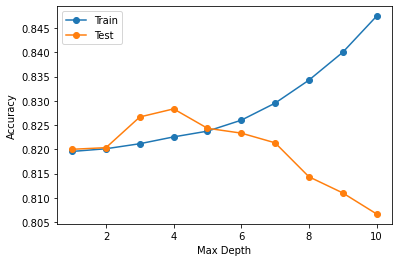

In [4]:
# Decision Tree
# Decision of Max Depth
# Using split random state 1
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

sc = preprocessing.StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

md_range = range(1, 11)
scores_train = []
scores = []

for md in md_range:
    dt = DecisionTreeClassifier(max_depth = md, random_state = 1)
    dt.fit(X_train_std, y_train)
    y_pred_dt_train = dt.predict(X_train_std)
    y_pred_dt = dt.predict(X_test_std)
    acscore_dt_train = accuracy_score(y_train, y_pred_dt_train)
    acscore_dt = accuracy_score(y_test, y_pred_dt)
    
    scores_train.append(acscore_dt_train)
    scores.append(acscore_dt)

plt.plot(range(1,11), scores_train, 'o-', label = 'Train')
plt.plot(range(1,11), scores, 'o-', label = 'Test')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [5]:
# Decision Tree
# Max Depth = 5

Training time usage is  2.2060644  s


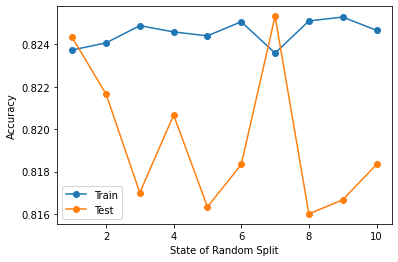

In [6]:
# Decision Tree
# Calculate accuracy for split random state 1-10
# Display the individual scores

md = 5

ascores_dt_train = []
ascores_dt_test = []
state_range = range(1, 11)

start = time.perf_counter()

for i_state in state_range:
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=i_state, stratify=y)
    
    dt = DecisionTreeClassifier(max_depth = md, random_state = 1)
    dt.fit(X_train, y_train)
    y_pred_dt_train = dt.predict(X_train)
    y_pred_dt_test = dt.predict(X_test)
    acscore_dt_train = accuracy_score(y_train, y_pred_dt_train)
    acscore_dt_test = accuracy_score(y_test, y_pred_dt_test)
    
    ascores_dt_train.append(acscore_dt_train)
    ascores_dt_test.append(acscore_dt_test)

mean_dt_train = np.mean(ascores_dt_train)
mean_dt_test = np.mean(ascores_dt_test)

sd_dt_train = np.std(ascores_dt_train)
sd_dt_test = np.std(ascores_dt_test)

end = time.perf_counter()
print ("Training time usage is ",end - start," s")

plt.plot(range(1,11), ascores_dt_train, 'o-', label = 'Train')
plt.plot(range(1,11), ascores_dt_test, 'o-', label = 'Test')
plt.legend()
plt.xlabel('State of Random Split')
plt.ylabel('Accuracy')
plt.show()

In [7]:
print('Results of train set: ')
print(ascores_dt_train)
print('Results of test set: ')
print(ascores_dt_test)

Results of train set: 
[0.8237407407407408, 0.8240740740740741, 0.8248888888888889, 0.8245925925925925, 0.8244074074074074, 0.8250740740740741, 0.8235925925925925, 0.8251111111111111, 0.8252962962962963, 0.8246666666666667]
Results of test set: 
[0.8243333333333334, 0.8216666666666667, 0.817, 0.8206666666666667, 0.8163333333333334, 0.8183333333333334, 0.8253333333333334, 0.816, 0.8166666666666667, 0.8183333333333334]


In [8]:
# Decision Tree
# Calculate the mean and standard deviation of the set

print("Mean of the train set: " + str(mean_dt_train))
print("Mean of the test set: " + str(mean_dt_test))
print("Standard Deviation of the train set: " + str(sd_dt_train))
print("Standard Deviation of the test set: " + str(sd_dt_test))

Mean of the train set: 0.8245444444444445
Mean of the test set: 0.8194666666666667
Standard Deviation of the train set: 0.0005563081322408158
Standard Deviation of the test set: 0.0032048574244591932


Training time usage is  2.0804133999999994  s
Results of 10-fold cross-validation: 
[0.81259259 0.82407407 0.80962963 0.81222222 0.82148148 0.8162963
 0.8162963  0.82074074 0.82185185 0.82925926]
Result of 10-fold cross-validation mean: 
0.8184444444444445
Result of 10-fold cross-validation standard deviation: 
0.005784895900198355


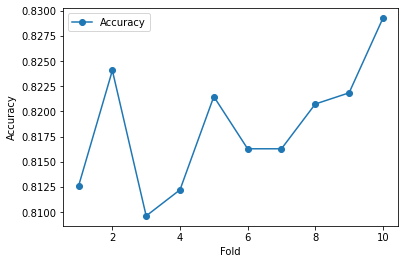

In [9]:
# Cross-validation

start = time.perf_counter()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1, stratify=y)

dt = DecisionTreeClassifier(max_depth = md, random_state = 33)

cv_dt = cross_val_score(dt, X_train, y_train, cv = 10)

mean = np.mean(cv_dt)
std = np.std(cv_dt)

dt.fit(X_train, y_train)
y_pred_dt_test = dt.predict(X_test_std)
acscore_dt_test = accuracy_score(y_test, y_pred_dt_test)

end = time.perf_counter()
print ("Training time usage is ",end - start," s")

print('Results of 10-fold cross-validation: ')
print(cv_dt)
print('Result of 10-fold cross-validation mean: ')
print(mean)
print('Result of 10-fold cross-validation standard deviation: ')
print(std)

plt.plot(range(1,11), cv_dt, 'o-', label = 'Accuracy')
plt.legend()
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

In [10]:
# Cross-validation
# Test Accuracy

print("Accuracy of test set: " + str(acscore_dt_test))

Accuracy of test set: 0.826


In [11]:
print("My name is Jingfan Xing")
print("My NetID is: jingfan5")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Jingfan Xing
My NetID is: jingfan5
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
